In [55]:
import nltk
import nltk.tokenize

# download the most recent punkt package
nltk.download('punkt', quiet=True)

corpus = ["alice.txt","anne.txt","oz.txt"]
titles = ["Alice in Wonderland", "Anne of Green Gables", "Wizard of Oz"]
documents = []
for url in corpus:
    f = open(url, encoding='utf-8')
    text = f.read()
    documents.append(text)
print(documents[1][0:100])

The Project Gutenberg EBook of Anne of Green Gables, by Lucy Maud Montgomery

This eBook is for the


In [45]:
import re


PUNCT_RE = re.compile(r'[^\w\s]+$')


def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None

In [46]:
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [47]:
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][11])

lewis


In [48]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

["'as-is", "'s", '1', '1.', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '1500', '2.', '20', '2001', '2020', '3', '3.', '30', '4', '4.', '5,000', '5.', '50', '501', '596-1887.', '60', '64-6221541.', '801', '809', '84116', '90', '_', '_am_', '_are_', '_at', '_best_', '_can_', '_cannot_', '_could_', '_dead', '_did_', '_don', '_ever_', '_glad_', '_good_', '_have_', '_he_', '_her_', '_i', '_i_', '_imagine_', '_instinctively_', '_is_', '_it_', '_know_', '_me_', '_must_', '_never_', '_not_', '_on', '_one_', '_quite_', '_she_', '_so_', '_such_', '_that', '_that_', '_think_', '_this_', '_un_important', '_very_', '_was_', '_were_', '_what', '_what_', '_will_', '_would_', '_you', '_you_', '_your_', 'a', 'abashed', 'abbey', 'abide', 'able']


In [49]:
def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))
girl_id = vocabulary.index('girl')
boy_id = vocabulary.index('boy')

girl_counts = document_term_matrix[:, girl_id]
boy_counts = document_term_matrix[:, boy_id]
print("Girl: " + str(girl_counts))
print("Boy: " + str(boy_counts))


Girl: [  4 163  93]
Boy: [ 2 48  2]


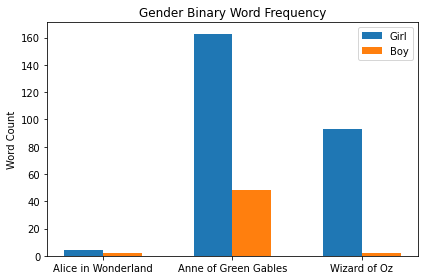

In [52]:
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, girl_counts, width, label='Girl')
rects2 = ax.bar(x + width/2, boy_counts, width, label='Boy')

ax.set_ylabel('Word Count')
ax.set_title('Gender Binary Word Frequency')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

In [53]:
alice = np.array([girl_counts[0], boy_counts[0]])
anne = np.array([girl_counts[1], boy_counts[1]])
oz = np.array([girl_counts[2], boy_counts[2]])

In [57]:
def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.

    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: The euclidean distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87

    """
    return np.sqrt(np.sum((a - b) ** 2))

aliceanne = euclidean_distance(alice, anne)
print(f'Alice - Anne: {aliceanne:.2f}')

aliceoz = euclidean_distance(alice, oz)
print(f'Alice - Oz: {aliceoz:.2f}')

anneoz = euclidean_distance(anne, oz)
print(f'Anne - Oz: {anneoz:.2f}')

Alice - Anne: 165.52
Alice - Oz: 89.00
Anne - Oz: 83.76
